In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
#laoding the csv data to pandas dataframe

gold_data = pd.read_csv('/content/gold_price_data.csv')

In [ ]:
#print first 5 rows

gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_data.shape

(2290, 6)

In [ ]:
#print last 5 rows

gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#checking number of missing values

gold_data.isnull().sum()


,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
#Statistical measures

gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation
1.Positive Correlation
2.Negative Correlation

In [ ]:
numerical_data = gold_data.select_dtypes(include=['float64', 'int64'])

correlation = numerical_data.corr()

<Axes: >

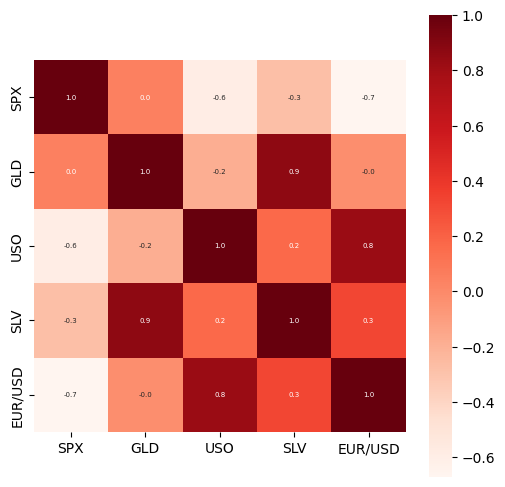

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':5}, cmap='Reds')

In [ ]:
#correlation values of gld

print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-22-ded64ed00e6b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color = 'Blue')


<Axes: xlabel='GLD', ylabel='Density'>

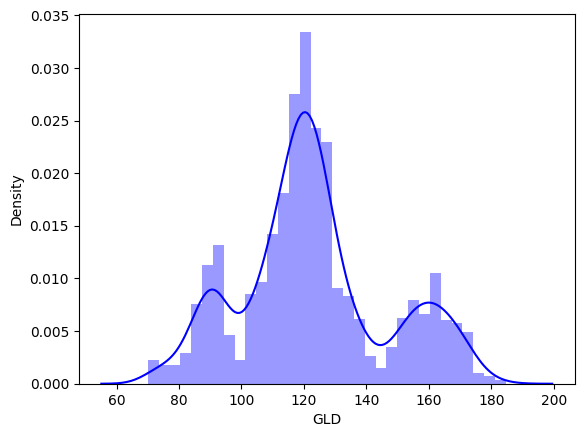

In [ ]:
#CHECKING THE DISTRIBUTION OF GOLD PRICE

sns.distplot(gold_data['GLD'], color = 'Blue')

Splitting the feautres and target

In [ ]:
X = gold_data.drop(['Date', 'GLD'], axis=1)
Y = gold_data['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training and test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

Model Training : Random Forest Regressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=120)

In [ ]:
regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=120)

In [ ]:
#Model Evaluation

test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[113.58708382 148.58025099 140.44774812 112.49958527 113.82674956
  95.5762496  111.76999983  93.28483242 120.94433379 127.1486663
 147.92999971 120.58283212 119.06466712  88.32475107  96.12700029
  92.79208193 116.58250063  88.97974925 125.30058424 114.92883353
 119.03599957 152.94266887 122.82249776 119.99766661 170.9749162
 108.42833179 120.57533402  87.24108234  88.03625084  88.55658248
 121.36391719 154.29375191 151.25633197 125.87891655 126.72366675
  90.95474871 159.74449962 121.40941828 106.67933355 144.06233042
  92.64158281 127.71633433 117.39891753 152.59958492 119.3884997
  91.26083507  79.69408315 120.10975194 133.01266657 119.08249985
 127.30266717 166.09791713 153.52941718  92.64399917 148.88974973
 151.99908286 112.87466724 112.60766694  87.19149935 127.82016559
 125.26691741 151.8105862  114.61333323 110.66541653 160.99991437
 117.02549857 108.44525117 131.99241612 133.61533434 125.48133346
 117.04358308 149.42550232 156.09641629 168.59666249 110.18208405
 141.11908166

In [ ]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error is : ", error_score)

R squared error is :  0.9877918956895901


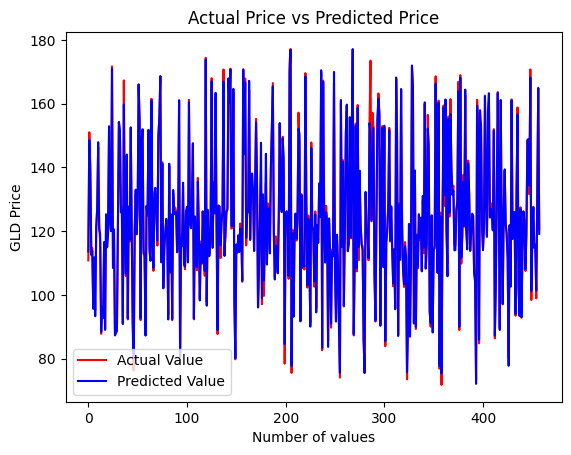

In [ ]:
#Using graphs and comparing actual and prediction values
Y_test = list(Y_test)
plt.plot(Y_test, color='red', label='Actual Value')
plt.plot(test_data_prediction, color='blue', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [36]:
#Prediction of Gold Prices

input_data = (16678.678, 52.89, 16.89, 1.78 )
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

gold_price = regressor.predict(input_data_reshaped)

print("Gold Price is:", gold_price)

Gold Price is: [125.72816827]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
